In [1]:
from settings import *
import soundfile as sf
import numpy as np
from scipy import signal
from scipy.signal import butter, lfilter, freqz, filtfilt
import librosa

In [2]:
normal_boundary = 0.03
qt_boundary = 0.0001
qs_boundary = 0.08

# Load all the signals in the numbers folder and cut them if the amplitude is too low and save them in a new folder
for number in NUMBERS:
    for person in PEOPLE:
        audio_path = NUMBERS_FOLDER + "/" + person + "_" + number + AUDIO_FORMAT
        num_audio, sample_rate = sf.read(audio_path)

        # find the first occurrence of an array elemen  t that is greater than boundary
        # find the last occurrence of an array element that is greater than boundary

        # if person == "qt" or person == "qh":
        #     num_audio = num_audio[np.where(abs(num_audio) >= qt_boundary)[0][0]:np.where(abs(num_audio) >= qt_boundary)[0][-1]-800]    
        
        # if person == "qs":
        #     num_audio = num_audio[np.where(abs(num_audio) >= qs_boundary)[0][0]:np.where(abs(num_audio) >= qs_boundary)[0][-1]-200]    
        
        # else:
        num_audio = num_audio[np.where(abs(num_audio) >= normal_boundary)[0][0]:np.where(abs(num_audio) >= normal_boundary)[0][-1]-1000]    
        
        sf.write("./processed_audio/" + person + "_" + number + "_cut.wav", num_audio, sample_rate)

In [3]:
# Make a filter to remove the noise from the audio
from scipy import signal
from scipy.io import wavfile
import matplotlib.pyplot as plt

# Load the audio file
for person in PEOPLE:
    for number in NUMBERS:  
        audio_path = PROCESSED_FOLDER + "/" + person + "_" + number + "_cut" + AUDIO_FORMAT
        num_audio, sample_rate = sf.read(audio_path)
        
        try:
            filter_order = 1
            cutoff_frequency = 1000.0
            normalized_cutoff_frequency = 2 * cutoff_frequency / sample_rate
            b, a = butter(filter_order, normalized_cutoff_frequency, btype='low')

            # Apply the filter to the noisy audio data
            num_audio = filtfilt(b, a, num_audio)
        except:
            pass
        
        sf.write("./filter_audio/" + person + "_" + number + "_filtered.wav", num_audio, sample_rate)

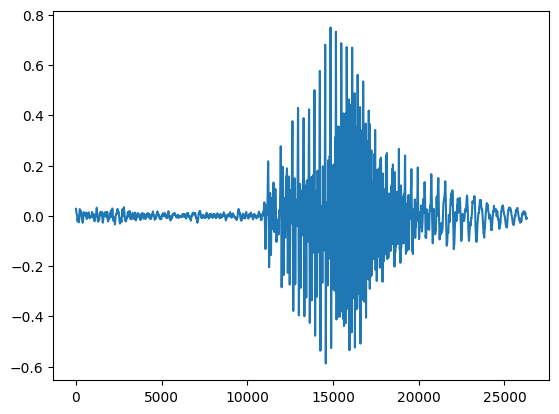

In [12]:
audio_path = "./filter_audio/vt_1_filtered.wav"
num_audio = sf.read(audio_path)
plt.plot(num_audio[0])
plt.show()


In [19]:
final_boundary = 0.05

for person in PEOPLE:
    for number in NUMBERS:  
        audio_path = FILTER_FOLDER + "/" + person + "_" + number + "_filtered" + AUDIO_FORMAT
        audio_signal, sample_rate = librosa.load(audio_path)

        num_audio = audio_signal[np.where(abs(audio_signal) >= final_boundary)[0][0]:np.where(abs(audio_signal) >= final_boundary)[0][-1]-1000]

        min_duration = 0.5
        current_duration = len(audio_signal) / sample_rate

        if current_duration < min_duration:
            pad_samples = int((min_duration - current_duration) * sample_rate / 2)          
            padded_audio = np.pad(audio_signal, (pad_samples, pad_samples), mode='constant')

        else:
            padded_audio = audio_signal

        padded_audio_path = "./final_audio/" + person + "_" + number + "_final.wav"
        sf.write(padded_audio_path, padded_audio, sample_rate)